In [1]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import warnings
warnings.filterwarnings("ignore")

##### Analysis of the data:

In [2]:
df = pd.read_csv("ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
df.drop(columns="Unnamed: 0",inplace=True)

In [7]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
df.shape

(607, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [10]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [13]:
for col in df.columns:
    print(col)
    print("**"*10)
    print(df[col].value_counts())

work_year
********************
2022    318
2021    217
2020     72
Name: work_year, dtype: int64
experience_level
********************
SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
employment_type
********************
FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64
job_title
********************
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manag

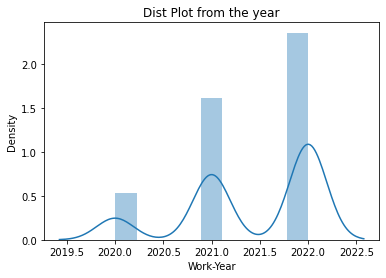

In [17]:
sns.distplot(df['work_year'])
plt.title('Dist Plot from the year')
plt.xlabel('Work-Year')
plt.show()

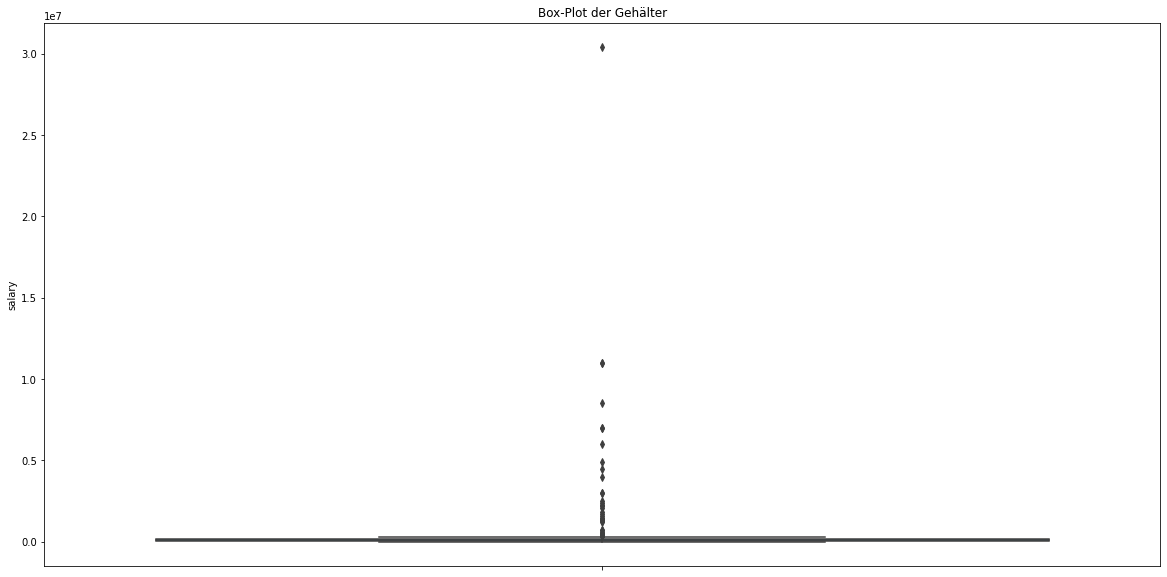

In [24]:
plt.figure(figsize=(20, 10))
sns.boxplot(y="salary", data=df)
plt.title("Box-Plot der Gehälter")
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


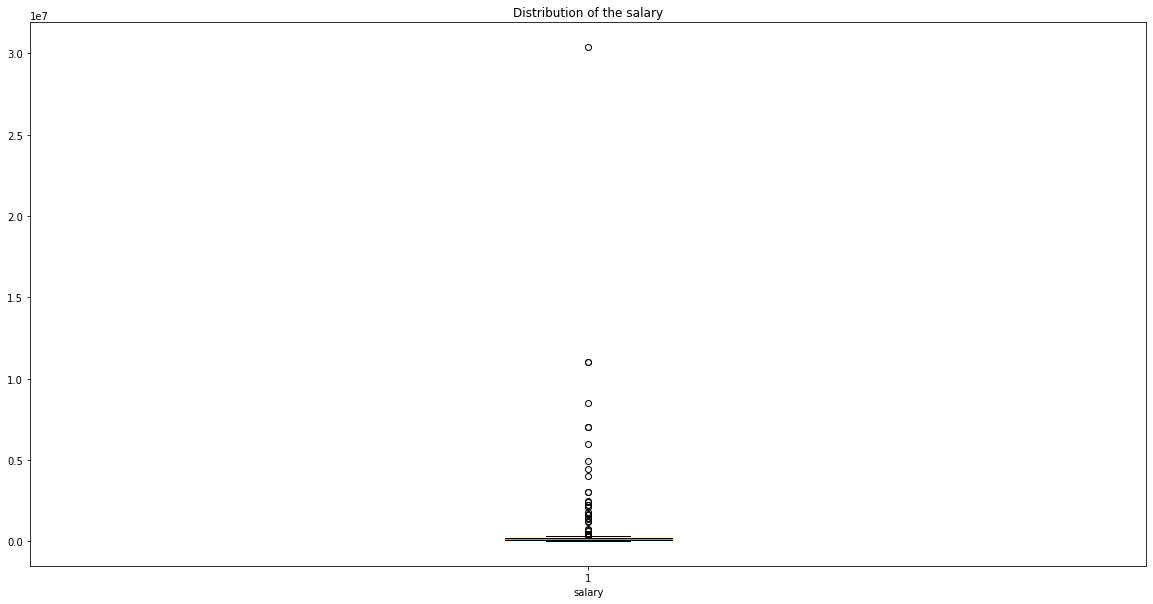

In [30]:
plt.figure(figsize=(20, 10))
plt.boxplot(df["salary"])
plt.xlabel('salary')
plt.title('Distribution of the salary')
plt.show()

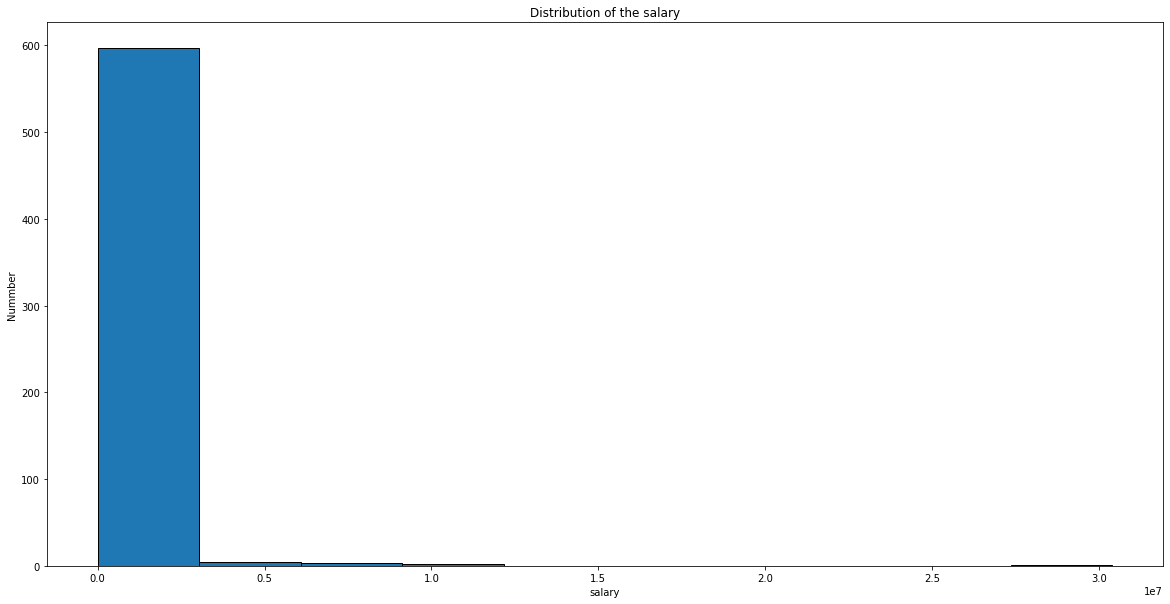

In [34]:
plt.figure(figsize=(20, 10))
plt.hist(df["salary"], bins=10, edgecolor='black')
plt.title("Distribution of the salary")
plt.xlabel("salary")
plt.ylabel("Nummber")
plt.show()

In [39]:
df["salary_currency"].head()

0    EUR
1    USD
2    GBP
3    USD
4    USD
Name: salary_currency, dtype: object

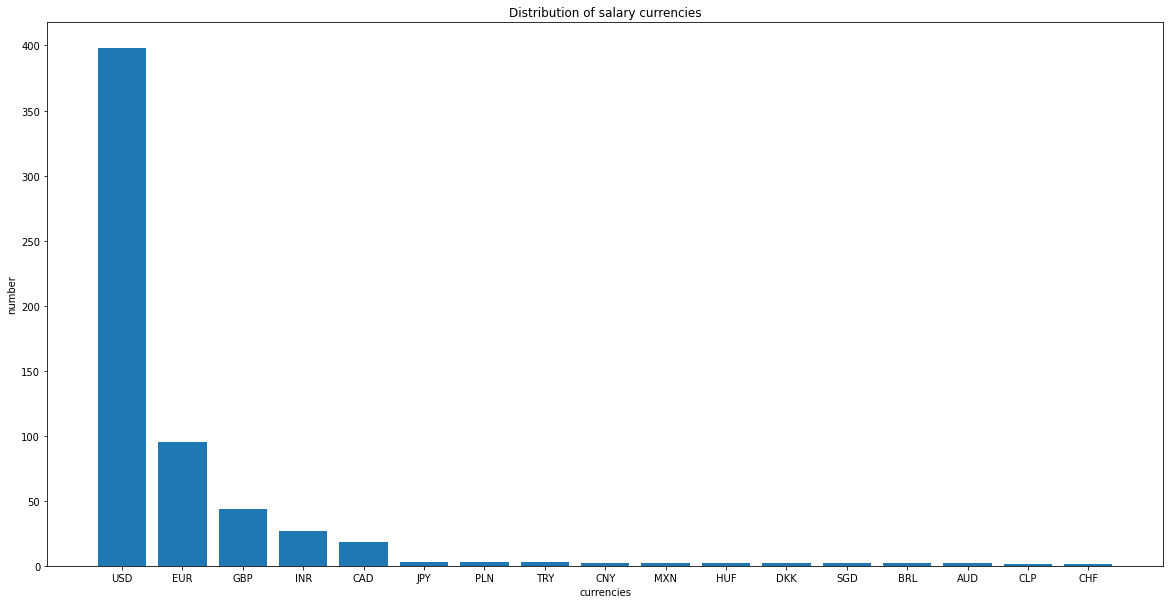

In [40]:
plt.figure(figsize=(20, 10))
currency_counts = df["salary_currency"].value_counts()
plt.bar(currency_counts.index, currency_counts)
plt.title("Distribution of salary currencies")
plt.xlabel("currencies")
plt.ylabel("number")
plt.show()

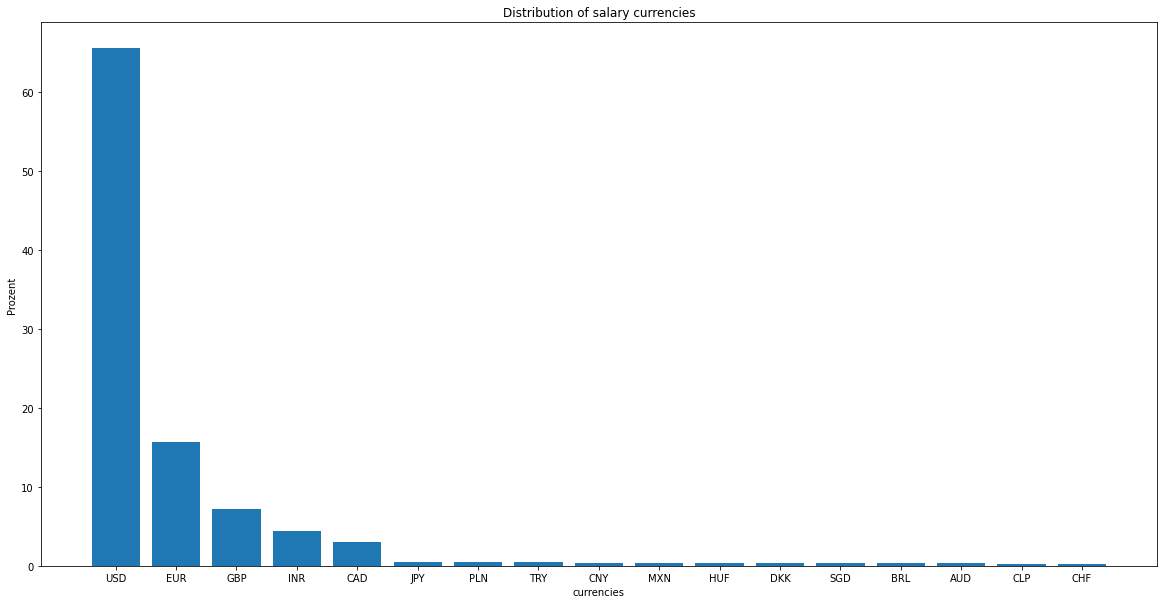

In [44]:
plt.figure(figsize=(20, 10))

currency_counts = df["salary_currency"].value_counts()
total_salaries = len(df["salary_currency"])
percentage = (currency_counts / total_salaries) * 100
plt.bar(currency_counts.index, percentage)

plt.title("Distribution of salary currencies")
plt.xlabel("currencies")
plt.ylabel("Prozent")

plt.show()

In [48]:
df["salary_in_usd"].head()

0     79833
1    260000
2    109024
3     20000
4    150000
Name: salary_in_usd, dtype: int64

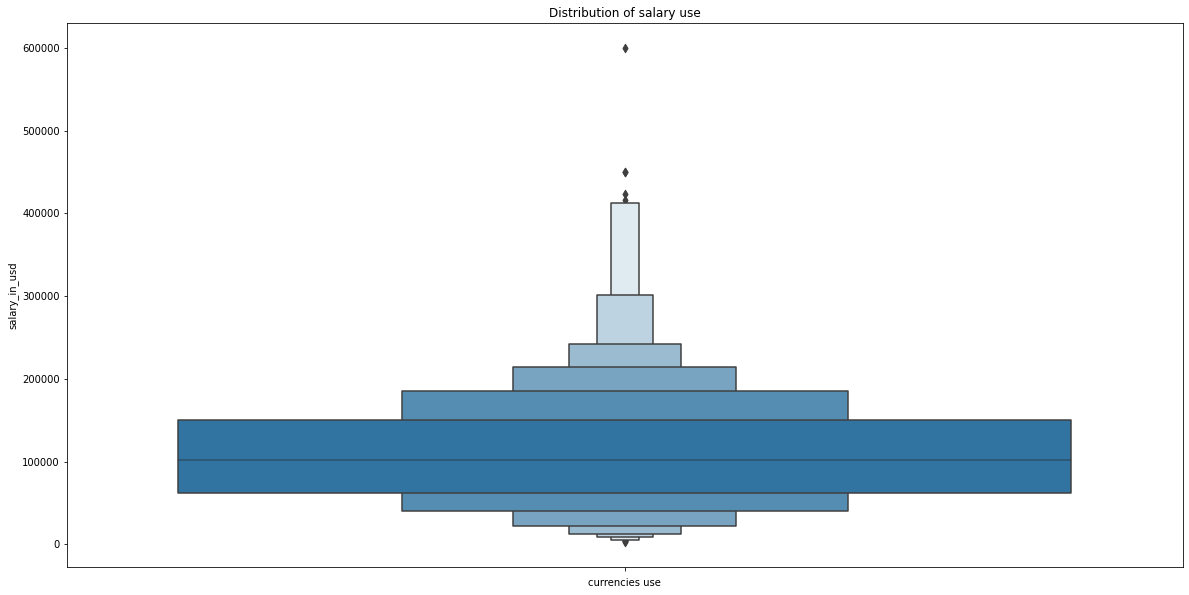

In [49]:
plt.figure(figsize=(20, 10))

sns.boxenplot(y="salary_in_usd", data = df)

plt.title("Distribution of salary use")
plt.xlabel("currencies use")

plt.show()

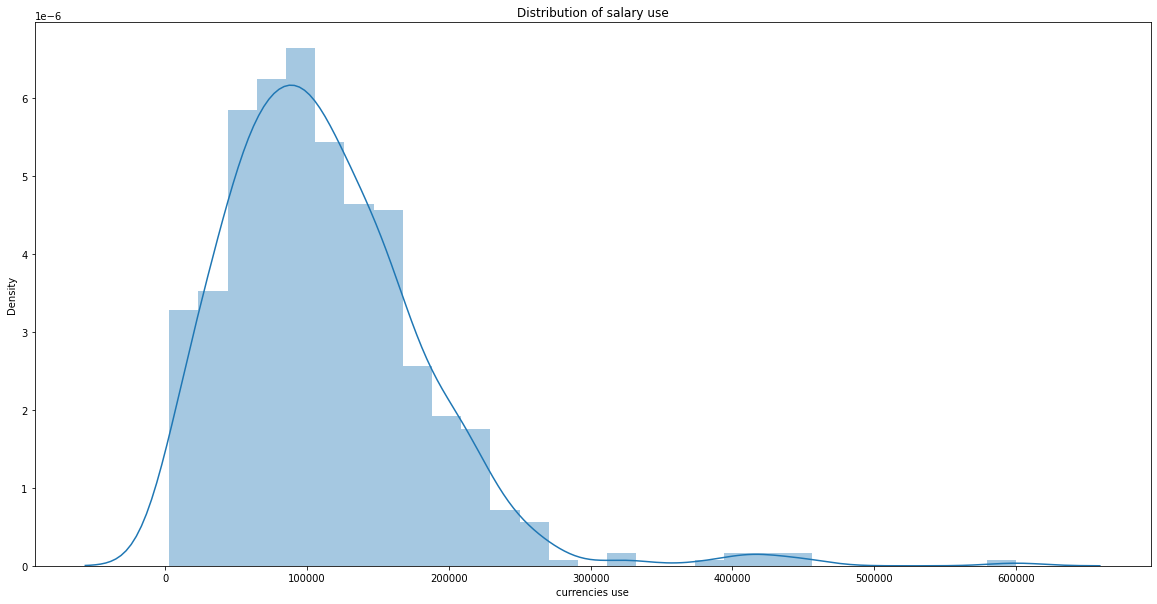

In [53]:
plt.figure(figsize=(20, 10))
sns.distplot(df['salary_in_usd'])

plt.title("Distribution of salary use")
plt.xlabel("currencies use")
plt.ylabel("Density")

plt.show()


In [55]:
df["remote_ratio"].head()

0     0
1     0
2    50
3     0
4    50
Name: remote_ratio, dtype: int64

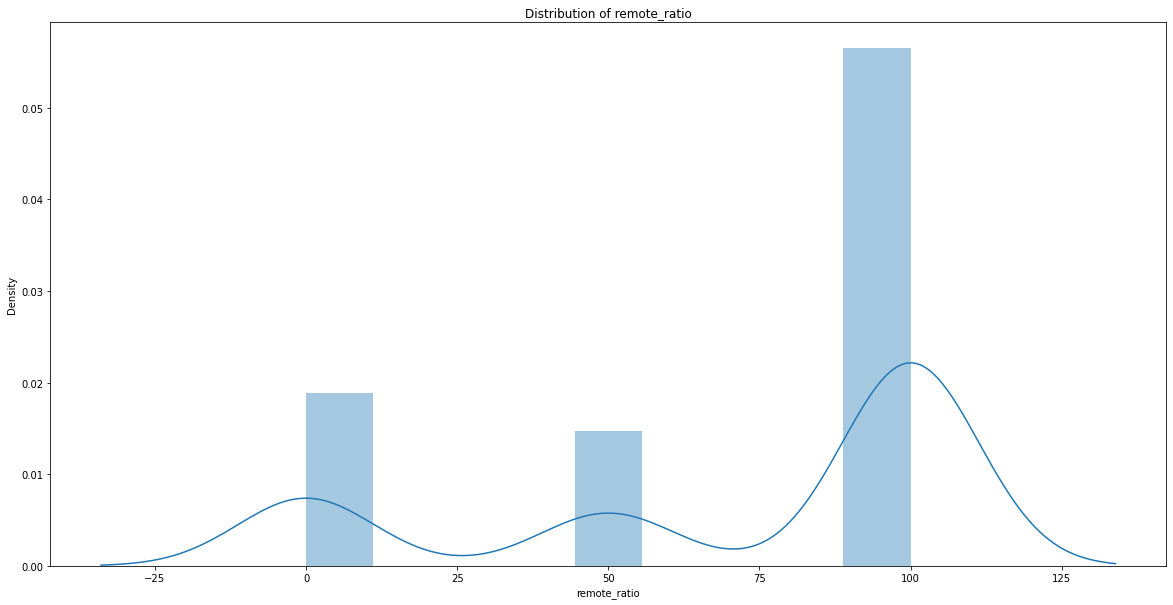

In [56]:
plt.figure(figsize=(20, 10))
sns.distplot(df['remote_ratio'])

plt.title("Distribution of remote_ratio")
plt.xlabel("remote_ratio")
plt.ylabel("Density")

plt.show()

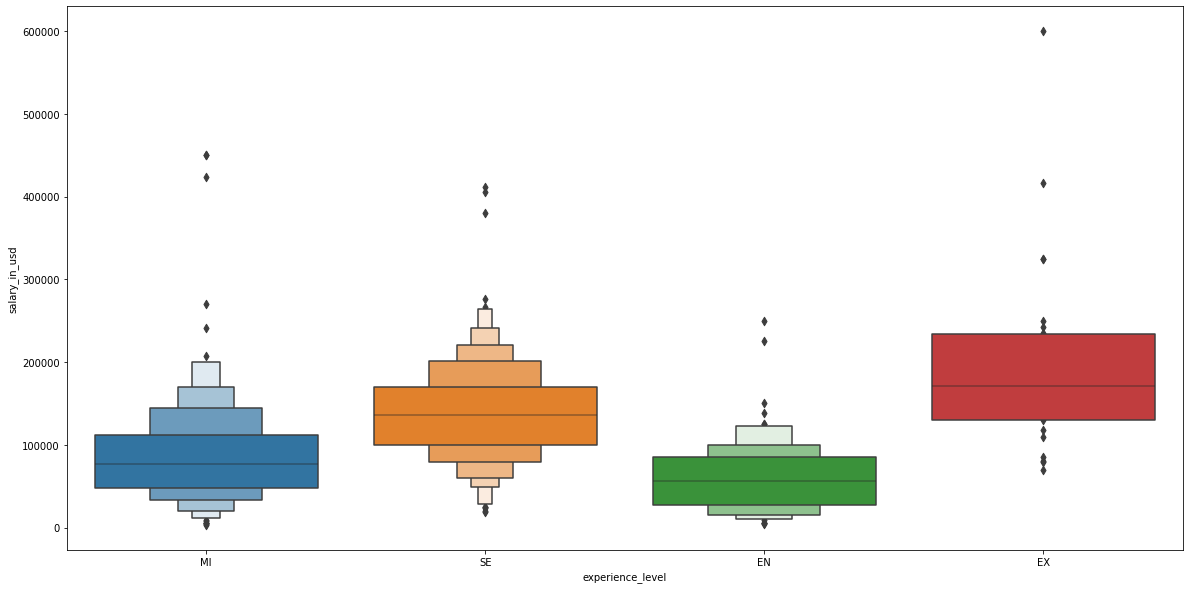

In [59]:
plt.figure(figsize=(20, 10))
sns.boxenplot(x="experience_level",
             y="salary_in_usd",
             data = df);

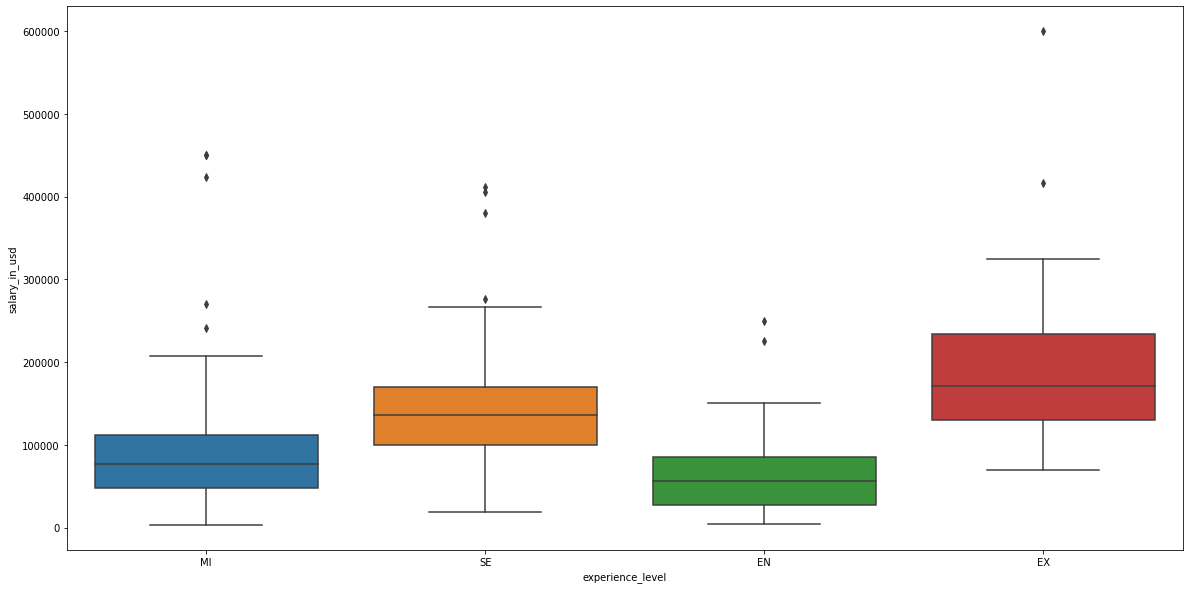

In [60]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="experience_level",
             y="salary_in_usd",
             data = df);

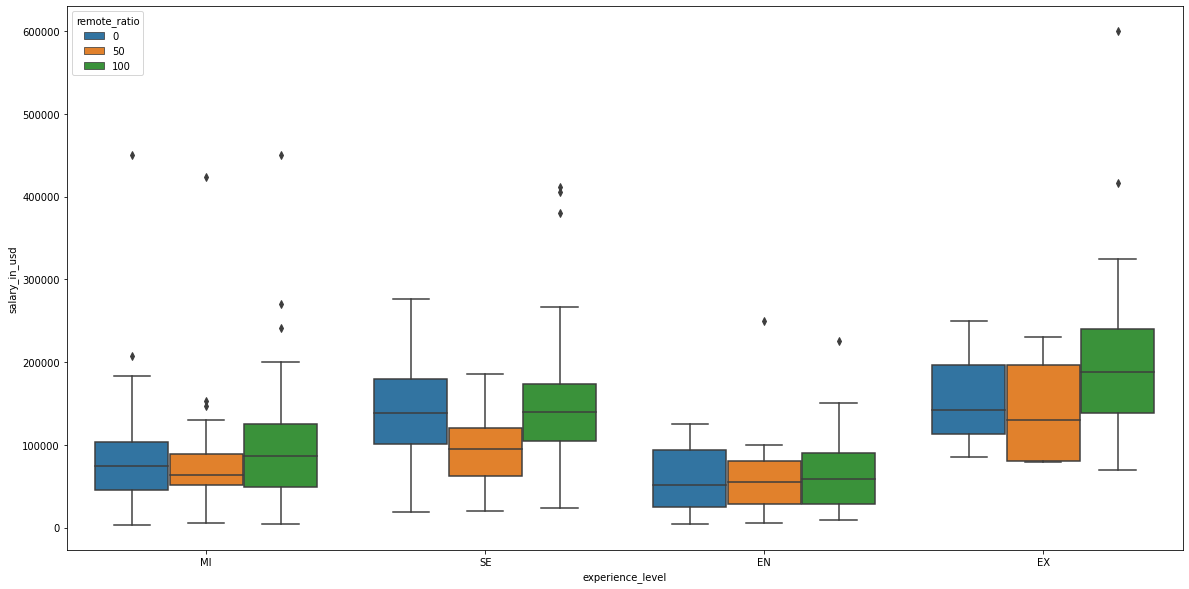

In [61]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="experience_level", y="salary_in_usd",hue='remote_ratio', data=df);

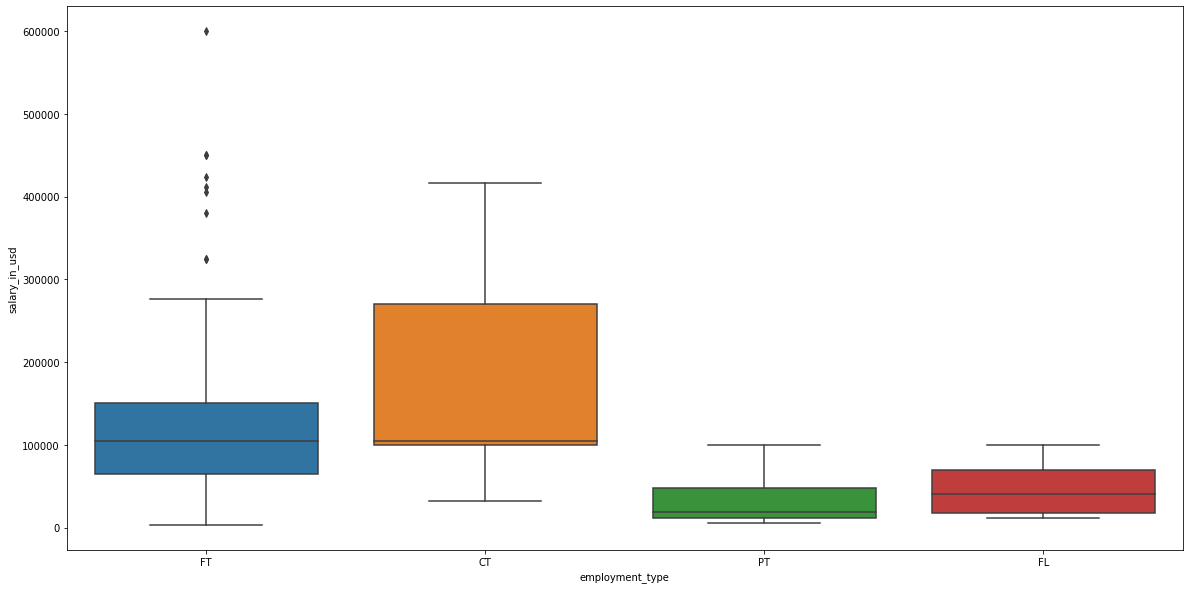

In [63]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="employment_type", y="salary_in_usd", data=df);

<Figure size 1440x720 with 0 Axes>

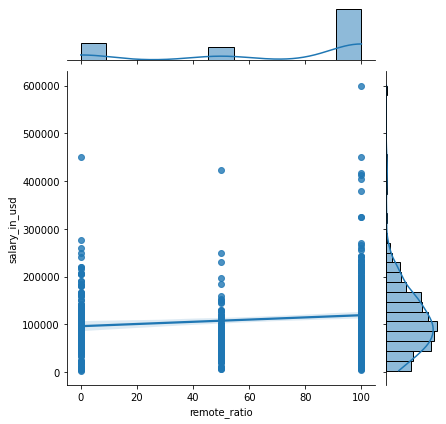

In [65]:
plt.figure(figsize=(20, 10))
sns.jointplot(x="remote_ratio", y="salary_in_usd", data=df, kind="reg");

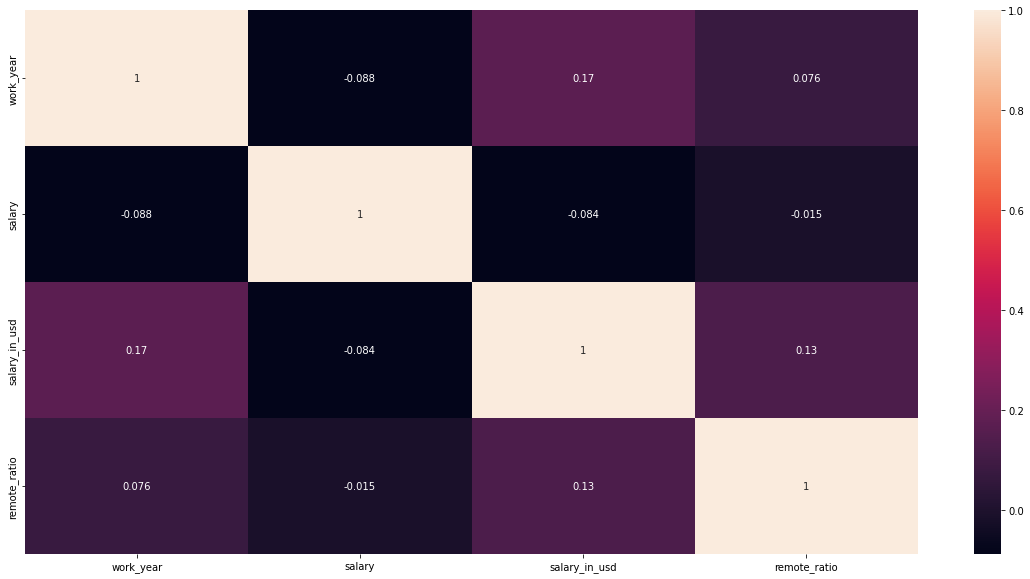

In [68]:
plt.figure(figsize=(20, 10))
corr=df.corr()
sns.heatmap(corr, annot=True);